**1.Import Libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
os.listdir('../input/whats-cooking-kernels-only')

['test.json', 'sample_submission.csv', 'train.json']

In [2]:
train_df = pd.read_json('../input/whats-cooking-kernels-only/train.json')
test_df = pd.read_json('../input/whats-cooking-kernels-only/test.json')

train_df['seperated_ingredients'] = train_df['ingredients'].apply(','.join)
test_df['seperated_ingredients'] = test_df['ingredients'].apply(','.join)

**2.Ingredients in a Dish**

In [3]:
print('Maximum Number of Ingredients in a Dish: ',train_df['ingredients'].str.len().max())
print('Minimum Number of Ingredients in a Dish: ',train_df['ingredients'].str.len().min())

Maximum Number of Ingredients in a Dish:  65
Minimum Number of Ingredients in a Dish:  1


**FUNNY NOTE:-The dish with just a single ingredient might be a simple boiled dish.**

Text(0.5, 1.0, 'Ingredients in a Dish Distribution')

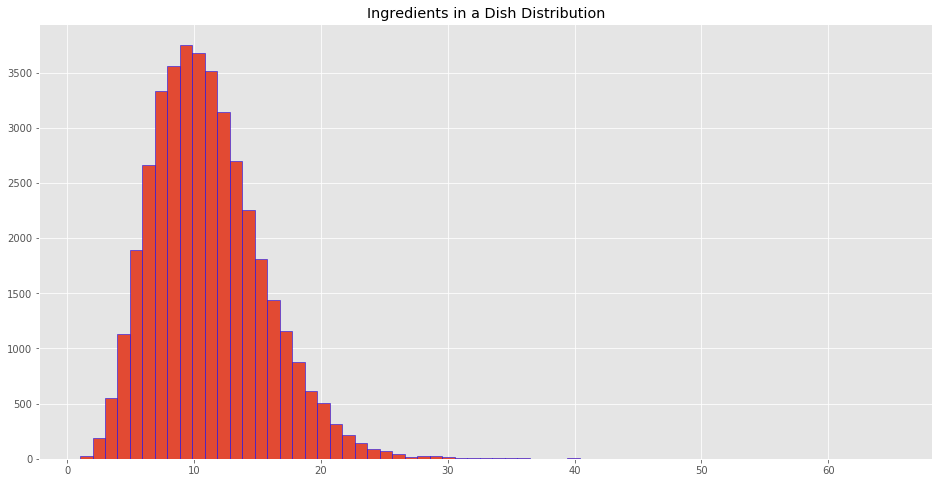

In [4]:
plt.hist(train_df['ingredients'].str.len(),bins=max(train_df['ingredients'].str.len()),edgecolor='b')
plt.gcf().set_size_inches(16,8)
plt.title('Ingredients in a Dish Distribution')

**3.Top Cuisines**

Text(0.5, 1.0, 'Cuisine Distribution')

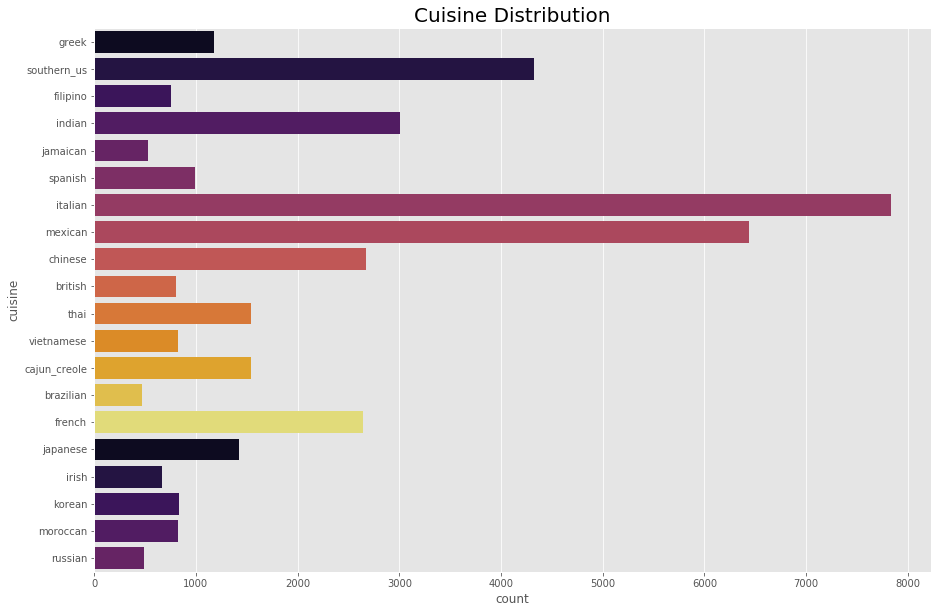

In [5]:
sns.countplot(y='cuisine', data=train_df,palette=sns.color_palette('inferno',15))
plt.gcf().set_size_inches(15,10)
plt.title('Cuisine Distribution',size=20)

**4.Main Ingredients**

Text(0.5, 1.0, 'Top 15 Ingredients')

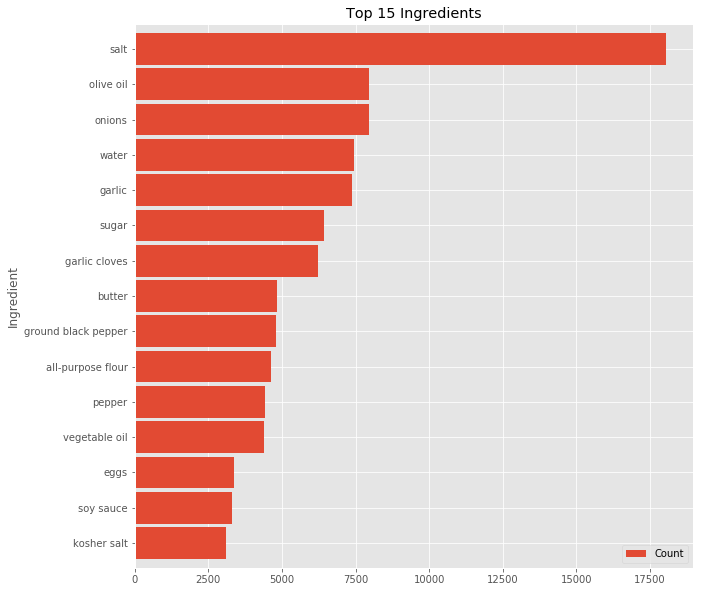

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(tokenizer=lambda x: [i.strip() for i in x.split(',')], lowercase=False)
counts = vec.fit_transform(train_df['seperated_ingredients']) 
count=dict(zip(vec.get_feature_names(), counts.sum(axis=0).tolist()[0]))
count=pd.DataFrame(list(count.items()),columns=['Ingredient','Count'])
count.set_index('Ingredient').sort_values('Count',ascending=False)[:15].plot.barh(width=0.9)
plt.gcf().set_size_inches(10,10)
plt.gca().invert_yaxis()
plt.title('Top 15 Ingredients')

**5.Finding Similar Dishes**

In [7]:
ingreList = []
for index, row in train_df.iterrows():
    ingre = row['ingredients']
    
    for i in ingre:
        if i not in ingreList:
            ingreList.append(i)
def binary(ingre_list):
    binaryList = []
    
    for item in ingreList:
        if item in ingre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList
train_df['bin ingredients']=train_df['ingredients'].apply(lambda x: binary(x))

**6.Encode cuisines to numeric values using LabelEncoder.**

In [8]:
from scipy import spatial

def Similarity(Id1, Id2):
    a = train_df.iloc[Id1]
    b = train_df.iloc[Id2]
    
    A = a['bin ingredients']
    B = b['bin ingredients']
    distance=spatial.distance.cosine(A,B)
    
    return distance, Id2

**7.Dishes Similar to Dish No.1**

In [9]:
food=[]
for i in train_df.index:
    food.append(Similarity(1,i))
common_ingredients=sorted(food,key=lambda x: x[0])[1:10]
indexes=[]
for i in range(len(common_ingredients)):
    indexes.append(common_ingredients[i][1])
train_df.iloc[indexes]

,id,cuisine,ingredients,seperated_ingredients,bin ingredients
26308,42852,british,"[eggs, vegetable oil, onions, ground black pep...","eggs,vegetable oil,onions,ground black pepper,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, ..."
5909,46403,southern_us,"[ground black pepper, cucumber, eggs, salt, mi...","ground black pepper,cucumber,eggs,salt,milk,al...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ..."
26464,42450,southern_us,"[flour, milk, salt, eggs, vegetable oil, yello...","flour,milk,salt,eggs,vegetable oil,yellow corn...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
6215,1915,southern_us,"[ground black pepper, yellow corn meal, salt, ...","ground black pepper,yellow corn meal,salt,oliv...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ..."
15862,30967,southern_us,"[green tomatoes, yellow corn meal, salt, veget...","green tomatoes,yellow corn meal,salt,vegetable...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
22917,47160,british,"[milk, eggs, plain flour, salt, pepper]","milk,eggs,plain flour,salt,pepper","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ..."
29322,21644,british,"[plain flour, sausages, milk, salt, eggs]","plain flour,sausages,milk,salt,eggs","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ..."
31153,20621,british,"[beef drippings, plain flour, salt, eggs, milk]","beef drippings,plain flour,salt,eggs,milk","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ..."
36409,18421,filipino,"[vegetable oil, eggs, asian eggplants, salt, g...","vegetable oil,eggs,asian eggplants,salt,ground...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ..."


**8.Top Bigrams by Cuisines**

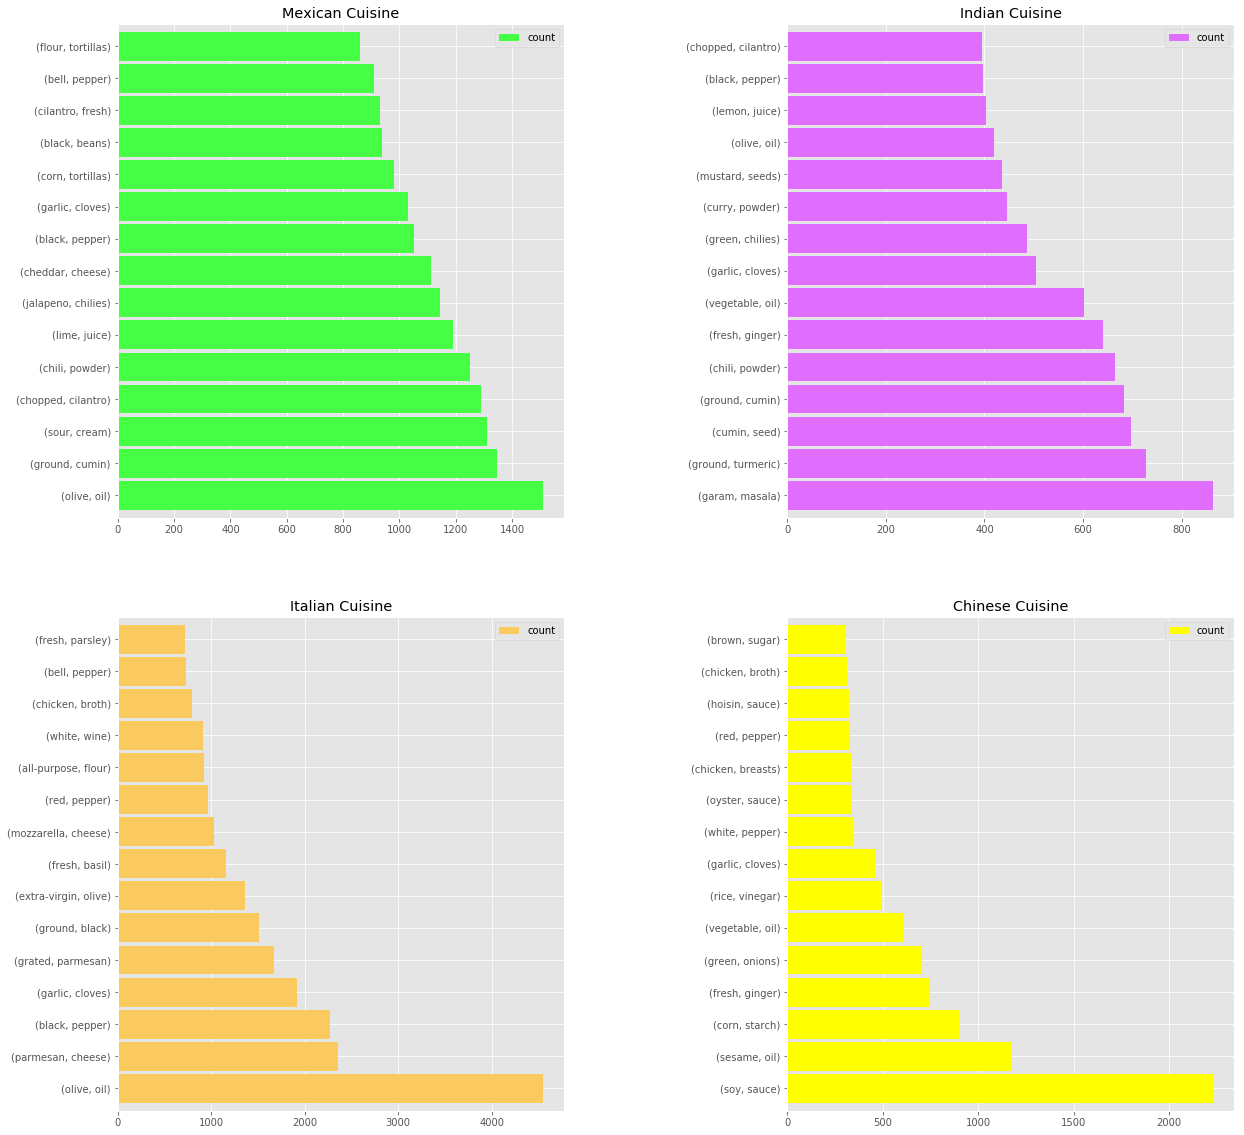

In [10]:
import nltk
from collections import Counter
train_df['for ngrams']=train_df['seperated_ingredients'].str.replace(',',' ')
f,ax=plt.subplots(2,2,figsize=(20,20))
def ingre_cusine(cuisine):
    frame=train_df[train_df['cuisine']==cuisine]
    common=list(nltk.bigrams(nltk.word_tokenize(" ".join(frame['for ngrams']))))
    return pd.DataFrame(Counter(common),index=['count']).T.sort_values('count',ascending=False)[:15]
ingre_cusine('mexican').plot.barh(ax=ax[0,0],width=0.9,color='#45ff45')
ax[0,0].set_title('Mexican Cuisine')
ingre_cusine('indian').plot.barh(ax=ax[0,1],width=0.9,color='#df6dfd')
ax[0,1].set_title('Indian Cuisine')
ingre_cusine('italian').plot.barh(ax=ax[1,0],width=0.9,color='#fbca5f')
ax[1,0].set_title('Italian Cuisine')
ingre_cusine('chinese').plot.barh(ax=ax[1,1],width=0.9,color='#ffff00')
ax[1,1].set_title('Chinese Cuisine')
plt.subplots_adjust(wspace=0.5)

**9.Network Diagrams for Bigrams**

In [11]:
import networkx as nx
def generate_ngrams(text, n):
    words = text.split(' ')
    iterations = len(words) - n + 1
    for i in range(iterations):
       yield words[i:i + n]
def net_diagram(*cuisines):
    ngrams = {}
    for title in train_df[train_df.cuisine==cuisines[0]]['for ngrams']:
            for ngram in generate_ngrams(title, 2):
                ngram = ','.join(ngram)
                if ngram in ngrams:
                    ngrams[ngram] += 1
                else:
                    ngrams[ngram] = 1

    ngrams_mws_df = pd.DataFrame.from_dict(ngrams, orient='index')
    ngrams_mws_df.columns = ['count']
    ngrams_mws_df['cusine'] = cuisines[0]
    ngrams_mws_df.reset_index(level=0, inplace=True)

    ngrams = {}
    for title in train_df[train_df.cuisine==cuisines[1]]['for ngrams']:
            for ngram in generate_ngrams(title, 2):
                ngram = ','.join(ngram)
                if ngram in ngrams:
                    ngrams[ngram] += 1
                else:
                    ngrams[ngram] = 1

    ngrams_mws_df1 = pd.DataFrame.from_dict(ngrams, orient='index')
    ngrams_mws_df1.columns = ['count']
    ngrams_mws_df1['cusine'] = cuisines[1]
    ngrams_mws_df1.reset_index(level=0, inplace=True)
    cuisine1=ngrams_mws_df.sort_values('count',ascending=False)[:25]
    cuisine2=ngrams_mws_df1.sort_values('count',ascending=False)[:25]
    df_final=pd.concat([cuisine1,cuisine2])
    g = nx.from_pandas_edgelist(df_final,source='cusine',target='index')
    cmap = plt.cm.RdYlGn
    colors = [n for n in range(len(g.nodes()))]
    k = 0.35
    pos=nx.spring_layout(g, k=k)
    nx.draw_networkx(g,pos, node_size=df_final['count'].values*8, cmap = cmap, node_color=colors, edge_color='grey', font_size=15, width=3)
    plt.title("Top 25 Bigrams for %s and %s" %(cuisines[0],cuisines[1]), fontsize=30)
    plt.gcf().set_size_inches(30,30)
    plt.show()
    plt.savefig('network.png')

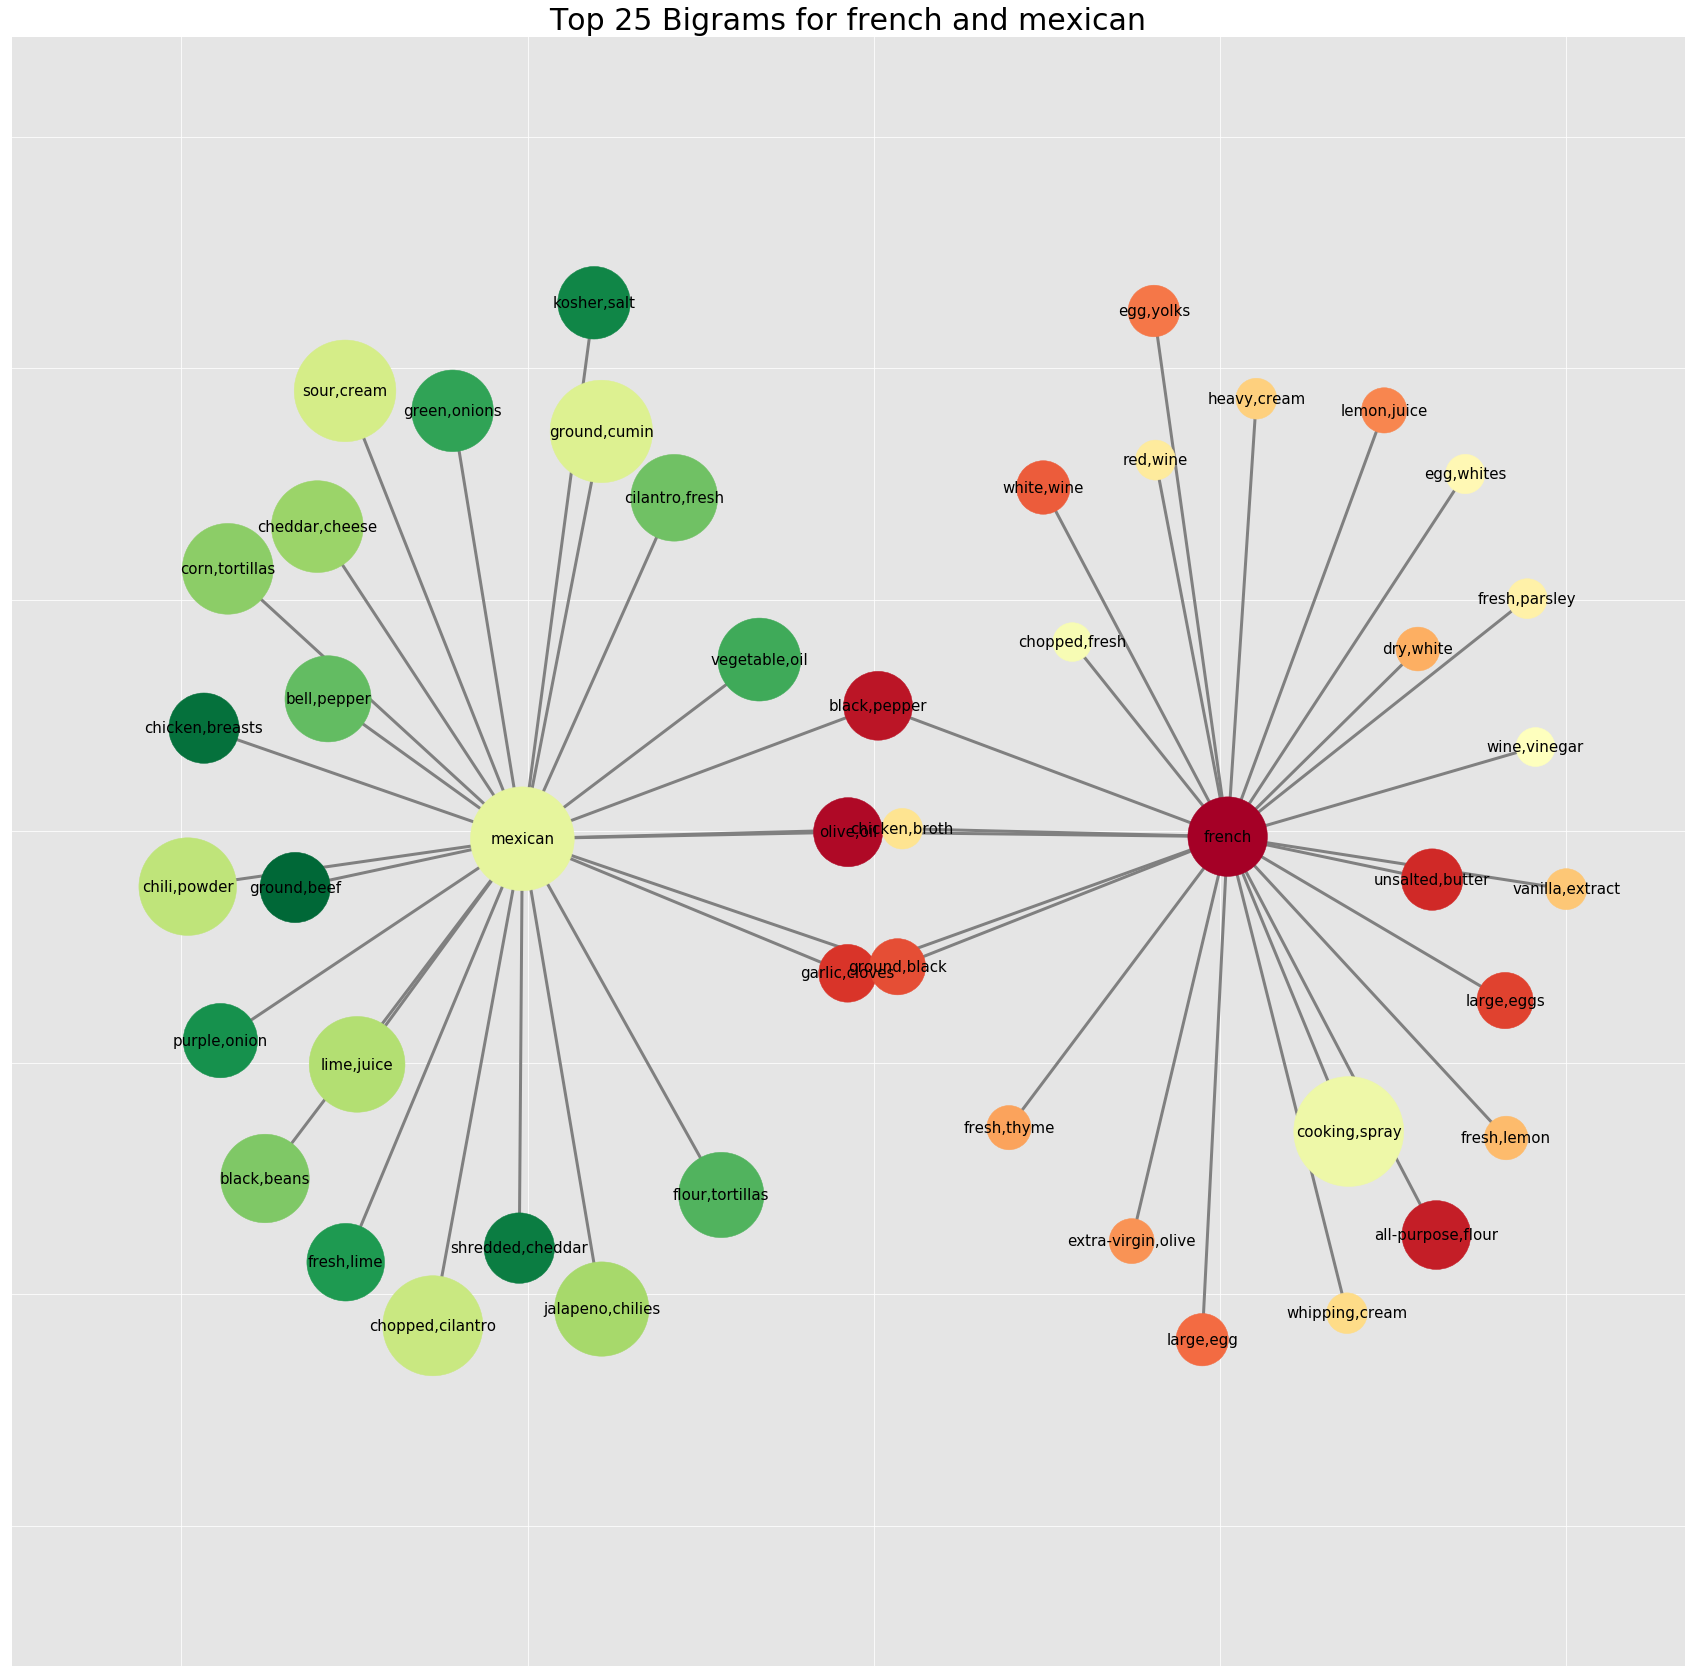

<Figure size 432x288 with 0 Axes>

In [12]:
net_diagram('french','mexican')

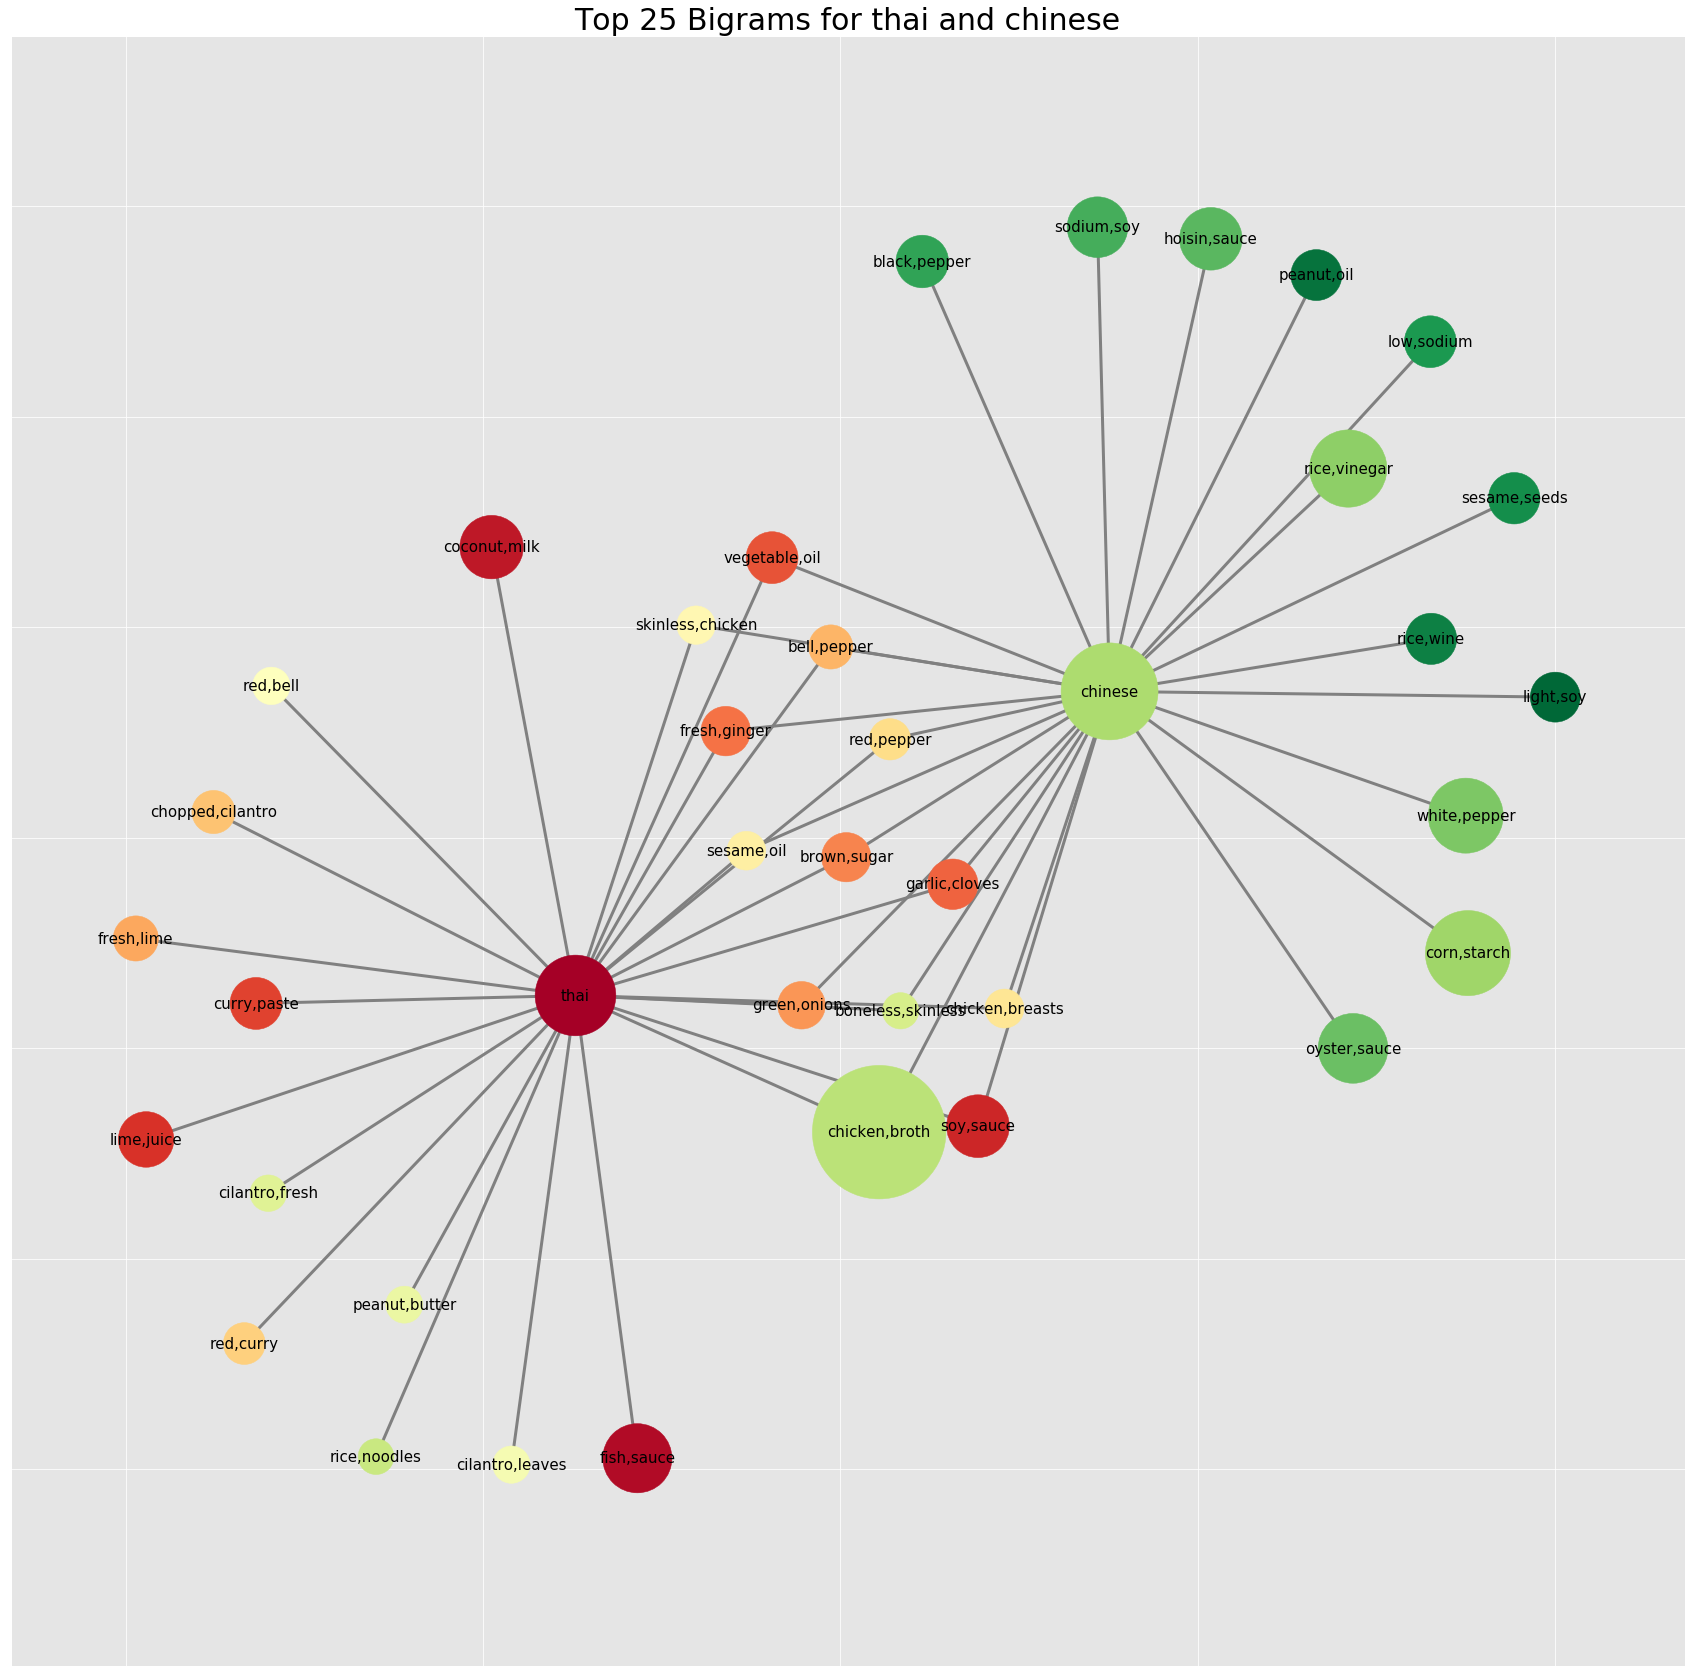

<Figure size 432x288 with 0 Axes>

In [13]:
net_diagram('thai','chinese')

**10.Modeling**

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(binary=True).fit(train_df['seperated_ingredients'].values)
X_train_vectorized = vect.transform(train_df['seperated_ingredients'].values)
X_train_vectorized = X_train_vectorized.astype('float')
Result_transformed = vect.transform(test_df['seperated_ingredients'].values)
Result_transformed = Result_transformed.astype('float')

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_transformed = encoder.fit_transform(train_df.cuisine)

**A.LOGISTIC REGRESSION**

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_vectorized, y_transformed , random_state = 0)

from sklearn.linear_model import LogisticRegression

clf1 = LogisticRegression(C=10,dual=False)
clf1.fit(X_train , y_train)
clf1.score(X_test, y_test)

0.7942477876106194

**B.ENSEMBLE MODEL**

In [17]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
vclf=VotingClassifier(estimators=[('clf1',LogisticRegression(C=10,dual=False)),('clf2',SVC(C=100,gamma=1,kernel='rbf',probability=True))],voting='soft',weights=[1,2])
vclf.fit(X_train , y_train)
vclf.score(X_test, y_test)

0.8151649235720032

**11.Submission**

In [18]:
y_predicted = vclf.predict(Result_transformed)
y_predicted_final = encoder.inverse_transform(y_predicted)
predictions = pd.DataFrame({'cuisine' : y_predicted_final , 'id' : test_df.id })
predictions = predictions[[ 'id' , 'cuisine']]
predictions.to_csv('foodisdelicious.csv', index = False)